In [1]:
import os, sys
os.chdir("..")
sys.path.append("..")

from utils.support import pkl_load
from train.versions.model import get_model
from train.versions.criterion import get_criterion
from train.versions.augmentation import get_augmentation
from train.run import MyDataset

from pathlib import Path
from torch_lr_finder import LRFinder
from torch.utils.data import DataLoader
import torch
import pandas as pd

In [2]:
cfg = {
    "model_version": 6,
    "criterion_version": 1,
    "augmentation_version": 2,
    
    "batch_size": 800,
    "n_jobs": 4,
    
    "lr_start": 0.0001,
    "lr_end": 1,
    "num_iter": 100
}

In [3]:
model = get_model(cfg["model_version"])
criterion = get_criterion(cfg["criterion_version"])

dataset_df = pkl_load(Path("../output/crossval_split/crossval_dct.pkl"))[1]["train"]
dataset = MyDataset(dataset_df, get_augmentation(cfg["criterion_version"])["train"])
dataloader = DataLoader(dataset, batch_size=cfg["batch_size"],
                        shuffle=True, num_workers=cfg["n_jobs"])

In [4]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=cfg["lr_start"])

lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(dataloader, end_lr=cfg["lr_end"], num_iter=cfg["num_iter"])

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 2.15E-03


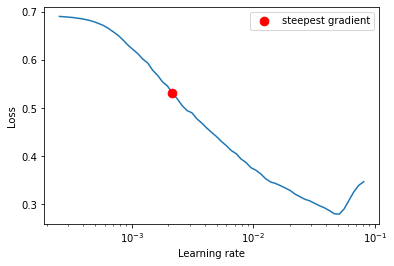

(<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>, 0.0021544346900318834)

In [5]:
lr_finder.plot()

In [ ]:
# h = pd.DataFrame(lr_finder.history)
# h[h["loss"] == h["loss"].min()]